# Stock Prediction of the google stock data

In [1]:
#loading the google dataset
import pandas as pd
df=pd.read_csv("GOOG.csv")
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [3]:
#converting the date column to datetype data type 
df['date']=pd.to_datetime(df['date'])
df=df.sort_values('date')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   symbol       1258 non-null   object             
 1   date         1258 non-null   datetime64[ns, UTC]
 2   close        1258 non-null   float64            
 3   high         1258 non-null   float64            
 4   low          1258 non-null   float64            
 5   open         1258 non-null   float64            
 6   volume       1258 non-null   int64              
 7   adjClose     1258 non-null   float64            
 8   adjHigh      1258 non-null   float64            
 9   adjLow       1258 non-null   float64            
 10  adjOpen      1258 non-null   float64            
 11  adjVolume    1258 non-null   int64              
 12  divCash      1258 non-null   float64            
 13  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [4]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


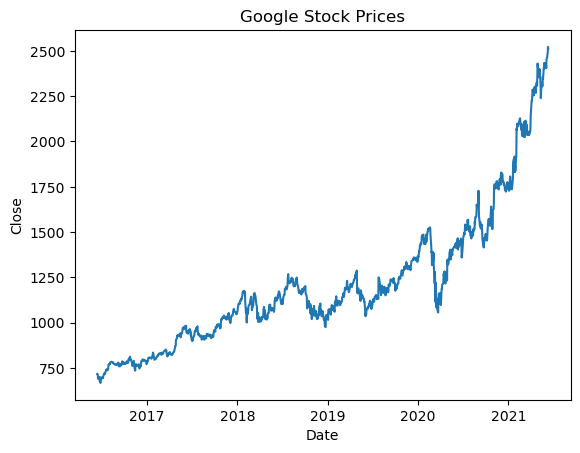

<Figure size 1800x1200 with 0 Axes>

In [5]:
#plotting the graph of the close column vesuse date column
plt.plot(df['date'], df['close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Prices')
plt.figure(figsize=(18,12))
plt.show()

In [6]:
#using 'close' price column for prediction
close_prices=df['close'].values.reshape(-1,1)

#normalize the dataset df
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(close_prices)

scaled_data

array([[0.02698372],
       [0.02733443],
       [0.02271575],
       ...,
       [0.98370509],
       [1.        ],
       [0.99586153]])

In [7]:
#creating the training _dataset
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

train_data,test_data

(array([[0.02698372],
        [0.02733443],
        [0.02271575],
        ...,
        [0.42512437],
        [0.43035277],
        [0.39689426]]),
 array([[0.40193381],
        [0.40553271],
        [0.4178726 ],
        [0.42240496],
        [0.41422513],
        [0.41193737],
        [0.42280423],
        [0.42957579],
        [0.41207226],
        [0.4171226 ],
        [0.37318571],
        [0.3921083 ],
        [0.40216582],
        [0.41534743],
        [0.42973227],
        [0.44645883],
        [0.44078259],
        [0.4466207 ],
        [0.4547088 ],
        [0.47130046],
        [0.45489764],
        [0.45988324],
        [0.45613865],
        [0.45849116],
        [0.45716922],
        [0.48423927],
        [0.48030043],
        [0.48573386],
        [0.45723936],
        [0.45518361],
        [0.46507387],
        [0.44896241],
        [0.46066021],
        [0.46574832],
        [0.43958475],
        [0.43499304],
        [0.42987795],
        [0.4345398 ],
        [0.448832

In [8]:
#defining the function to create the dataset in time series format
def create_dataset(df, time_step=1):
    X, Y=[],[]
    for i in range(len(df)-time_step-1):
        X.append(df[i:(i+time_step), 0])
        Y.append(df[i+time_step, 0])
    return np.array(X), np.array(Y)



In [9]:
#training and testing the dataset using defined create function

time_step=60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
#building LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
#training the model
model.fit(X_train, y_train, batch_size=1, epochs=5)

Epoch 1/5

945/945 [==============================] - 40s 35ms/step - loss: 9.7749e-04
Epoch 2/5
945/945 [==============================] - 33s 35ms/step - loss: 3.5922e-04
Epoch 3/5
945/945 [==============================] - 34s 36ms/step - loss: 3.1218e-04
Epoch 4/5
945/945 [==============================] - 33s 35ms/step - loss: 2.4279e-04
Epoch 5/5
945/945 [==============================] - 33s 35ms/step - loss: 2.3854e-04


In [12]:
#making predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

#inversing the transformations after prediction to get the actual values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])


6/6 [==============================] - 0s 25ms/step


In [13]:
#calculating RMSE
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))

print(f'Train RMSE: {train_score}')
print(f'Test RMSE: {test_score}')


Train RMSE: 38.85168879588519
Test RMSE: 48.352884252849314


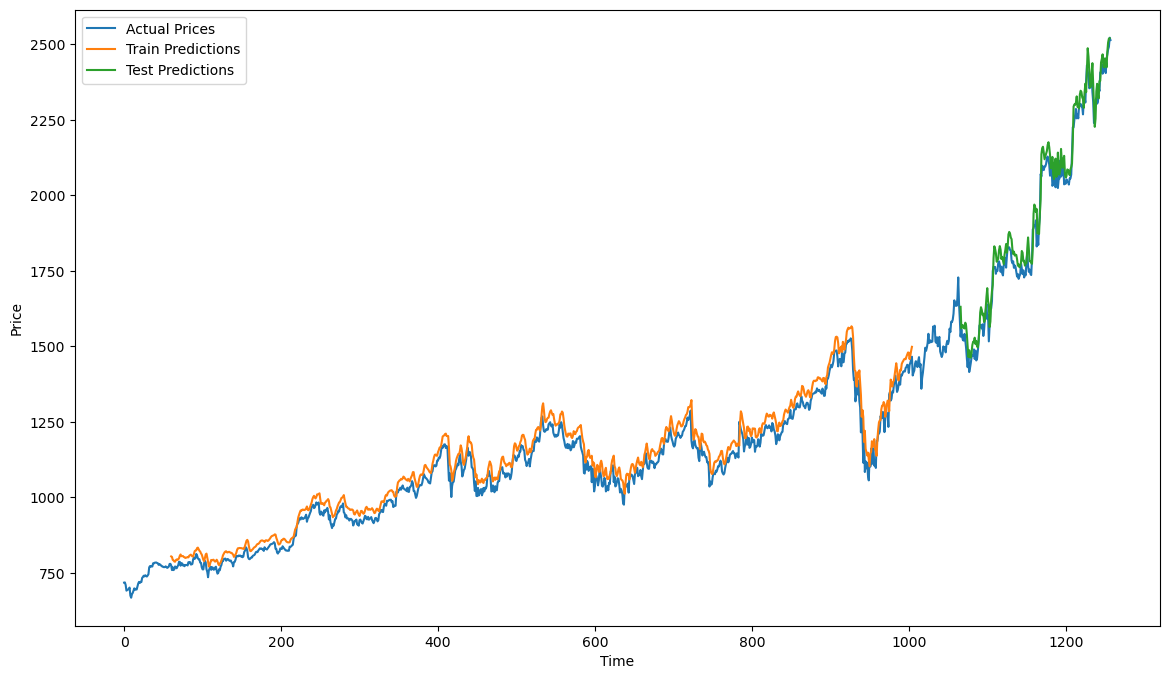

In [14]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.plot(scaler.inverse_transform(scaled_data), label='Actual Prices')
plt.plot(np.arange(time_step, len(train_predict) + time_step), train_predict, label='Train Predictions')
plt.plot(np.arange(len(train_predict) + (time_step * 2) + 1, len(scaled_data) - 1), test_predict, label='Test Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [15]:
# Create a new dataset for the test case
new_data = scaled_data[-(time_step+1):]

# # Prepare the data
# X_new, y_new = create_dataset(new_data, time_step)
# X_new = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)


In [16]:
new_data

array([[0.76770587],
       [0.73810526],
       [0.74187143],
       [0.73938403],
       [0.7471376 ],
       [0.74287503],
       [0.74249733],
       [0.73774375],
       [0.7487509 ],
       [0.74852968],
       [0.75559261],
       [0.79288744],
       [0.84026137],
       [0.83982971],
       [0.8532811 ],
       [0.86178467],
       [0.87281341],
       [0.85603829],
       [0.86277208],
       [0.85606527],
       [0.87862993],
       [0.87922346],
       [0.88172704],
       [0.87699505],
       [0.87681159],
       [0.86312279],
       [0.88868745],
       [0.89486009],
       [0.8842738 ],
       [0.92354884],
       [0.95051637],
       [0.93984914],
       [0.93178262],
       [0.90970356],
       [0.91104708],
       [0.92432581],
       [0.93368189],
       [0.90291042],
       [0.88515869],
       [0.8475617 ],
       [0.85991237],
       [0.88915148],
       [0.8919842 ],
       [0.8822828 ],
       [0.88513171],
       [0.91069636],
       [0.90476653],
       [0.937

In [17]:
#Testing the model with data from the dataset that is new to the model

time_step = 3

# Prepare the data
X_new, y_new = create_dataset(new_data, time_step)

# Debug prints
print("X_new shape:", X_new.shape)
print("y_new shape:", y_new.shape)

# Reshape X_new if it's not empty and has the correct dimensions
if X_new.shape[0] > 0 and len(X_new.shape) == 2:
    X_new = X_new.reshape(X_new.shape[0], X_new.shape[1], 1)
    print("X_new reshaped:", X_new.shape)
else:
    print("Error: X_new does not have the expected dimensions.")

X_new shape: (57, 3)
y_new shape: (57,)
X_new reshaped: (57, 3, 1)


In [18]:
# Make prediction
new_predict = model.predict(X_new)

# Inverse transform the predictions to get actual values
new_predict = scaler.inverse_transform(new_predict)
y_new = scaler.inverse_transform([y_new])

# Print the predictions and actual values
print('Predictions:', new_predict)
print('Actual:', y_new)

2/2 [==============================] - 1s 0s/step
Predictions: [[2254.795 ]
 [2256.2974]
 [2268.933 ]
 [2265.879 ]
 [2261.6035]
 [2252.9775]
 [2270.908 ]
 [2277.7383]
 [2289.5588]
 [2365.1982]
 [2479.3416]
 [2500.5112]
 [2518.407 ]
 [2543.085 ]
 [2567.3503]
 [2537.482 ]
 [2539.7114]
 [2533.3833]
 [2574.059 ]
 [2588.9587]
 [2589.418 ]
 [2580.936 ]
 [2577.4878]
 [2550.5815]
 [2595.4172]
 [2624.8474]
 [2600.5315]
 [2674.6003]
 [2754.2097]
 [2735.606 ]
 [2706.0623]
 [2658.789 ]
 [2652.7817]
 [2686.724 ]
 [2712.7566]
 [2649.7375]
 [2595.2576]
 [2517.2166]
 [2526.654 ]
 [2600.7495]
 [2619.895 ]
 [2594.8396]
 [2594.9414]
 [2651.304 ]
 [2651.8508]
 [2711.7742]
 [2733.0378]
 [2752.8677]
 [2723.6367]
 [2722.1494]
 [2749.8909]
 [2743.6787]
 [2719.7253]
 [2770.3923]
 [2801.8213]
 [2817.7417]
 [2829.6724]]
Actual: [[2038.59 2052.96 2045.06 2044.36 2035.55 2055.95 2055.54 2068.63 2137.75
  2225.55 2224.75 2249.68 2265.44 2285.88 2254.79 2267.27 2254.84 2296.66
  2297.76 2302.4  2293.63 2293.29 2267.